# Task:  Prediction using the Decision Tree algorithm

### Importing the necessary libraries

In [236]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [232]:
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [166]:
df = pd.read_csv('Iris.csv') 
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


### Droping the unnecessary columns

In [167]:
df = df.drop('Id', axis=1)
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


### Exploring the dataset

In [7]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [168]:
df.shape

(150, 5)

In [169]:
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [174]:
df.Species.value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

####  We observe there are 50 entries of each species .


In [ ]:
#plot for species column by count

<Axes: xlabel='count', ylabel='Species'>

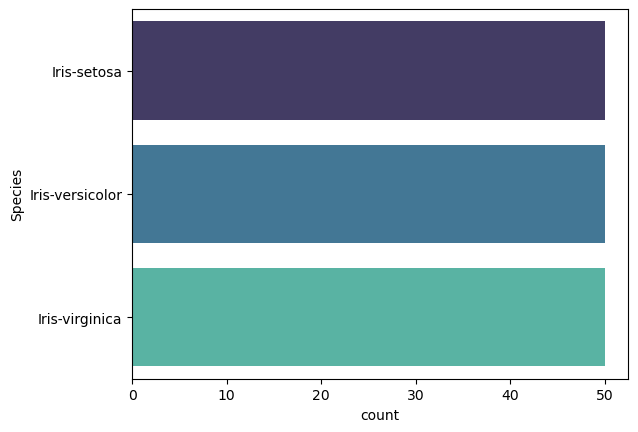

In [175]:
sns.countplot(y= df.Species, palette = "mako")

### Data preprocesssing (Correlation Matrix) to convert Categorical variable

In [186]:
##checking the correlation matrix of the categorical variables
df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954,0.782561
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757,0.949043
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000,0.956464
Species,0.782561,-0.419446,0.949043,0.956464,1.000000


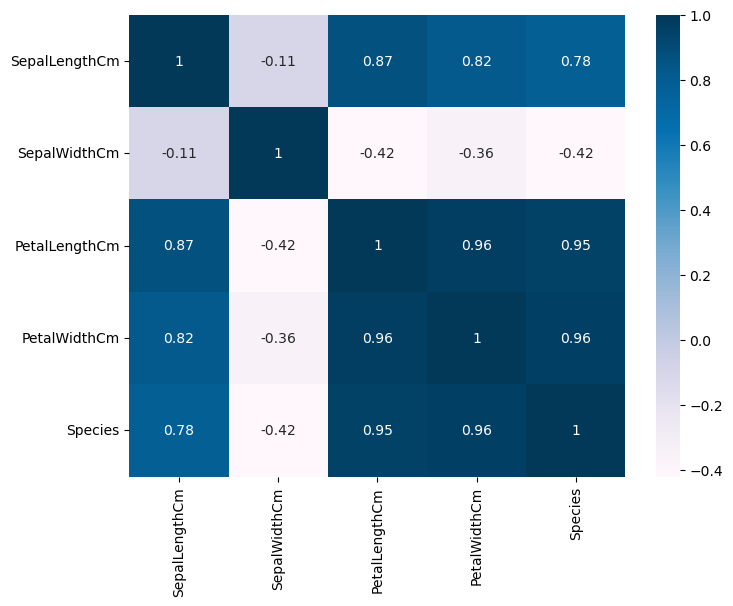

In [187]:
# Plotting the corelation matrix
plt.figure(figsize = (8,6))
sns.heatmap(df.corr(), annot = True, cmap = 'PuBu')
plt.show()

In [188]:
#sklearn library
from sklearn.preprocessing import LabelEncoder 

In [189]:
from sklearn.compose import ColumnTransformer 

In [190]:
LE = LabelEncoder() 

In [198]:
df.iloc[:,-1] = LE.fit_transform(df.iloc[:,-1])
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


### Spliting Data Into Independant abd Dependant Variable

In [193]:
x = df.iloc[:,:-1]

In [194]:
x.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [202]:
convert_dict = { 'Species' : int}
df = df.astype(convert_dict)
print(df.dtypes)

# needed to convert species because the next line code was giving data type as species as object which was giving error into fitting the y dataset into the classifier  

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species            int32
dtype: object


In [203]:
y = df.iloc[:,-1]
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Species, dtype: int32

### Spliting the  Dataset into Train and Test Split

In [204]:
from sklearn.model_selection import train_test_split

In [205]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size= 0.20,random_state=50)

In [206]:
X_train.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
125,7.2,3.2,6.0,1.8
98,5.1,2.5,3.0,1.1
73,6.1,2.8,4.7,1.2
144,6.7,3.3,5.7,2.5
21,5.1,3.7,1.5,0.4


In [134]:
print(X_train.shape,X_test.shape)

(120, 4) (30, 4)


In [135]:
print(y_train.shape, y_test.shape)

(120,) (30,)


### Model Building(DT)

In [242]:
from sklearn.tree import DecisionTreeClassifier
dt= DecisionTreeClassifier()

In [243]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

### Comparision Between Actual and Predicted Output

In [209]:
y_pred = dt.predict(X_test)
y_pred

array([1, 1, 0, 0, 2, 2, 2, 0, 0, 1, 0, 2, 0, 2, 1, 0, 1, 0, 1, 2, 2, 1,
       0, 2, 1, 2, 1, 1, 1, 2])

In [210]:
y_test = np.array(y_test)
y_test

array([1, 1, 0, 0, 2, 2, 2, 0, 0, 1, 0, 2, 0, 2, 1, 0, 1, 0, 1, 1, 2, 1,
       0, 2, 1, 2, 1, 1, 1, 2])

In [220]:
final_pred = pd.DataFrame( { 'Actual': y_test,
                           'Predicted': dt.predict(X_test)} )

In [221]:
final_pred.sample(n=10)

,Actual,Predicted
15,0,0
5,2,2
19,1,2
28,1,1
7,0,0
27,1,1
20,2,2
26,1,1
14,1,1
25,2,2


### Accuracy of DT Model

In [211]:
from sklearn.metrics import accuracy_score

In [212]:
accuracy_score(y_pred,y_test)

0.9666666666666667

### Confusion Matrics for DT Model

In [215]:
from sklearn.metrics import confusion_matrix

In [214]:
confusion_matrix(y_pred,y_test)

array([[ 9,  0,  0],
       [ 0, 11,  0],
       [ 0,  1,  9]], dtype=int64)

#### The confusion matrix shows the ways in which your classification model is confused when it makes predictions.

### Classification Report of DT Model

In [68]:
from sklearn.metrics import classification_report

In [69]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.92      1.00      0.96        11
           2       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



#### Precision is defined as the number of true positives divided by the number of true positives and of false positives.


#### precision = TP/TP+FP

### DT Model Visualisation 

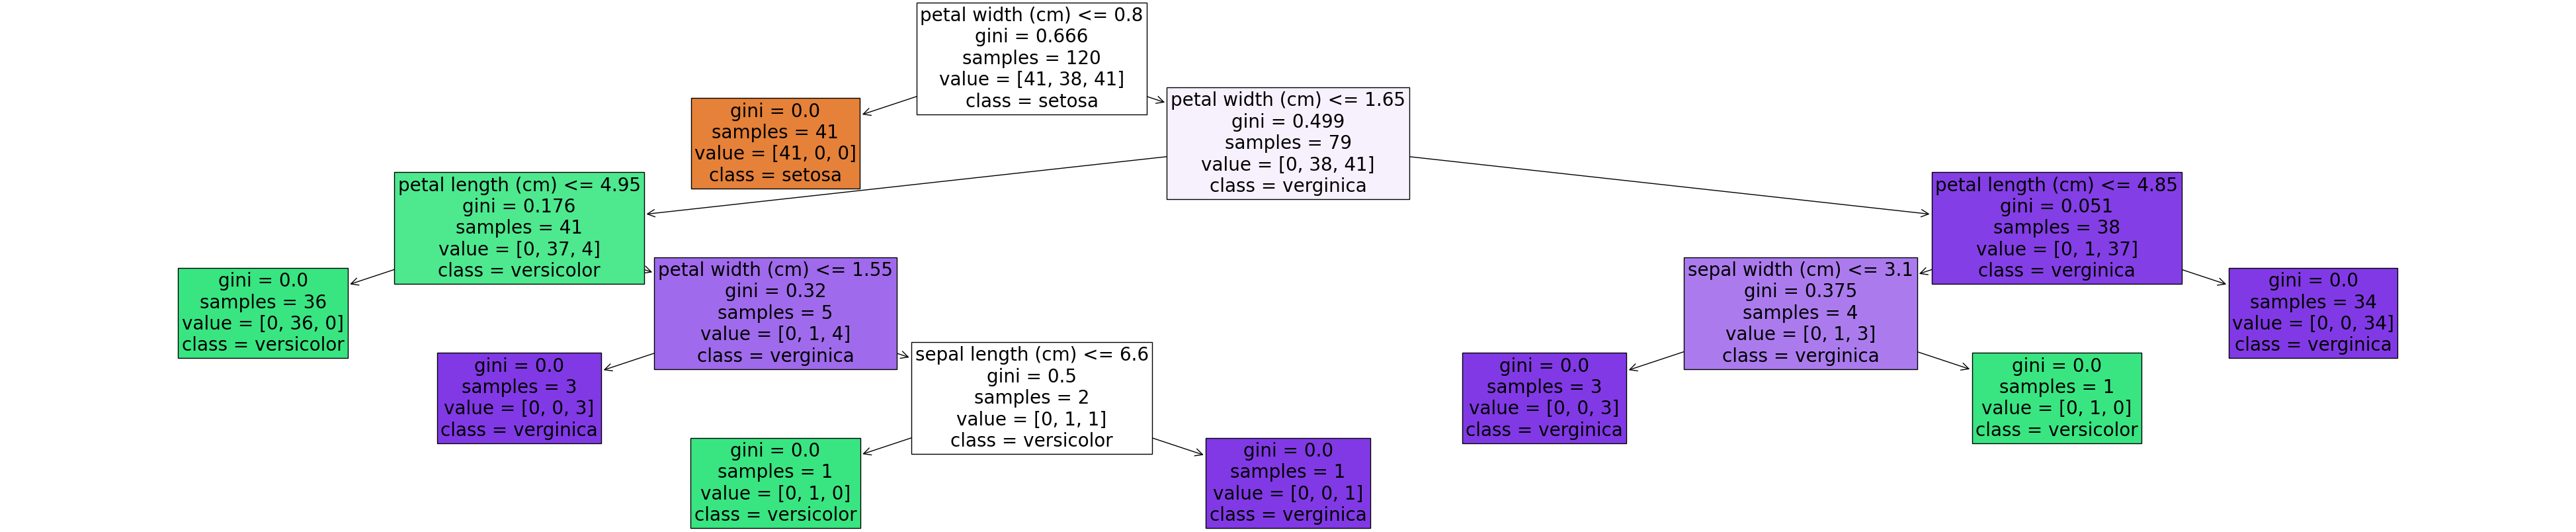

In [246]:
plt.figure(figsize=(50,10))
from sklearn import tree

fn=['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
cn=['setosa', 'versicolor', 'verginica']

tree=plot_tree(dt,feature_names=fn,class_names=cn,filled=True,fontsize=20)


### The Decision Tree Classifier is created and is visualised graphically. Also the prediction was calculated using decision tree algorithm and the accuracy of the model is evaluated.